This taks is done by dowloading the images from different links

In [ ]:
dogs_links = pd.read_csv('dogs.csv')

In [ ]:
dogs_links.head()

,Img_URL
0,https://tse4.mm.bing.net/th?id=OIP.n0RsnnQ7iV9...
1,https://tse2.mm.bing.net/th?id=OIP.L3OEU1xZ4MK...
2,https://tse1.mm.bing.net/th?id=OIP.QjzoJ_c9Fy9...
3,https://tse3.mm.bing.net/th?id=OIP.A2orZZ1u2zq...
4,https://tse3.mm.bing.net/th?id=OIP.jP5dVGDGlW9...


In [ ]:
dogs_links.shape

(617, 1)

In [ ]:
for i in range(len(dogs_links)):    
    url = dogs_links['Img_URL'][i]
    resp = urllib.request.urlopen(url)
    image_data = resp.read()
    # Open output file in binary mode, write, and close.
    f = open(os.getcwd()+'\\data\\Dogs\\'+'dog_'+str(i)+'.jpg','wb')
    f.write(image_data)
    f.close()

In [ ]:
cats_links = pd.read_csv('cats.csv')

In [ ]:
cats_links.head()

,Img_URL
0,https://tse2.mm.bing.net/th?id=OIP.wuZRvCAWSjd...
1,https://tse4.mm.bing.net/th?id=OIP.M9tKB5T-cU_...
2,https://tse3.mm.bing.net/th?id=OIP.iYyPimFLj1_...
3,https://tse2.mm.bing.net/th?id=OIP.dZ2Q9NSndi9...
4,https://tse4.mm.bing.net/th?id=OIP.6C8jTceMZG7...


In [ ]:
for i in range(len(cats_links)):    
    url_cat = cats_links['Img_URL'][i]
    resp = urllib.request.urlopen(url_cat)
    image_data = resp.read()
    # Open output file in binary mode, write, and close.
    f = open(os.getcwd()+'\\data\\Cats\\'+'cat_'+str(i)+'.jpg','wb')
    f.write(image_data)
    f.close()

In [2]:
import tensorflow as tf
import time
import keras
import random
import numpy as np                                
import matplotlib.pyplot as plt
import seaborn as sns
import keras as k
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from sklearn.preprocessing import LabelBinarizer
from keras.optimizers import SGD, Adam
from keras.regularizers import l2
import h5py
import cv2
import os
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator,load_img

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

#Training Set
train_set = train_datagen.flow_from_directory(directory=r"/content/drive/My Drive/train/",
                                             target_size=(64,64),
                                             batch_size=32,
                                             class_mode='binary',
                                             shuffle=True,
                                             color_mode="rgb")
#Validation
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/test/',
                                           target_size=(64,64),
                                           batch_size = 7,
                                           class_mode='binary',
                                           shuffle=False)
#print(train_generator.class_indices)

Found 1371 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [5]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
conv_base= ResNet50(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

94773248/94765736 [==============================] - 1s 0us/step


In [6]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [18]:
#model.summary()

In [19]:
#conv_base = ResNet50(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

In [33]:
model = Sequential()

model.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2)) #if stride not given it equal to pool filter size

model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

adam = keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])

In [35]:
model.fit_generator(train_set, 
                        epochs = 20,
                        validation_data = train_set,
                        )

Epoch 1/20
43/43 [==============================] - 105s 2s/step - loss: 0.7356 - accuracy: 0.5558 - val_loss: 0.7030 - val_accuracy: 0.4406
Epoch 2/20
43/43 [==============================] - 10s 236ms/step - loss: 0.6824 - accuracy: 0.6018 - val_loss: 0.6922 - val_accuracy: 0.4807
Epoch 3/20
43/43 [==============================] - 11s 251ms/step - loss: 0.6437 - accuracy: 0.6331 - val_loss: 0.6785 - val_accuracy: 0.6637
Epoch 4/20
43/43 [==============================] - 10s 234ms/step - loss: 0.6279 - accuracy: 0.6521 - val_loss: 0.6716 - val_accuracy: 0.6871
Epoch 5/20
43/43 [==============================] - 10s 238ms/step - loss: 0.5997 - accuracy: 0.6769 - val_loss: 0.6646 - val_accuracy: 0.6878
Epoch 6/20
43/43 [==============================] - 10s 238ms/step - loss: 0.5908 - accuracy: 0.7002 - val_loss: 0.6546 - val_accuracy: 0.7017
Epoch 7/20
43/43 [==============================] - 10s 239ms/step - loss: 0.5877 - accuracy: 0.6944 - val_loss: 0.6450 - val_accuracy: 0.6769
E

In [36]:
print('Cats and Dogs Image Classification Training Model Accuracy : ')
print(model.evaluate_generator(generator=train_set))

Cats and Dogs Image Classification Training Model Accuracy : 
Instructions for updating:
Please use Model.evaluate, which supports generators.
[0.35184013843536377, 0.8679795861244202]


In [37]:
print('Cats and Dogs Image Classification Testing Model Accuracy : ')
print(model.evaluate_generator(generator=test_set))

Cats and Dogs Image Classification Testing Model Accuracy : 
[0.47185149788856506, 0.75]


In [39]:
import pandas as pd
test_set.reset
ytesthat = model.predict_generator(test_set)
df = pd.DataFrame({
    'filename':test_set.filenames,
    'predict':ytesthat[:,0],
    'y':test_set.classes
})
df.head()

Instructions for updating:
Please use Model.predict, which supports generators.


,filename,predict,y
0,Cats/cat_010.jpg,0.086404,0
1,Cats/cat_013.jpg,0.282790,0
2,Cats/cat_045.jpg,0.599150,0
3,Cats/cat_100.jpg,0.537077,0
4,Cats/cat_101.jpg,0.633122,0


In [42]:
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)
df#.head(10)

,filename,predict,y,y_pred
0,Cats/cat_010.jpg,0.086404,0,0
1,Cats/cat_013.jpg,0.282790,0,0
2,Cats/cat_045.jpg,0.599150,0,1
3,Cats/cat_100.jpg,0.537077,0,1
4,Cats/cat_101.jpg,0.633122,0,1
5,Cats/cat_102.jpg,0.499697,0,0
6,Cats/cat_103.jpg,0.431036,0,0
7,Cats/cat_104.jpg,0.082141,0,0
8,Cats/cat_105.jpg,0.076953,0,0
9,Cats/cat_106.jpg,0.646956,0,1


([<matplotlib.axis.YTick at 0x7fe0a13d5898>,
 [Text(0, 0.5, 'Cat'), Text(0, 1.5, 'Dog')])

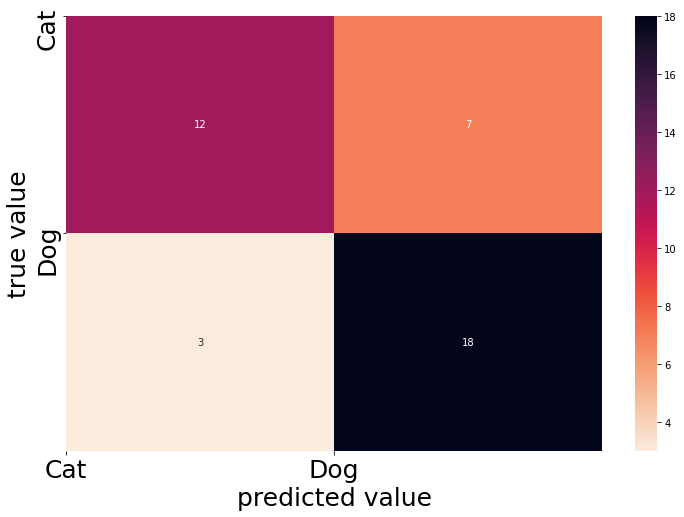

In [41]:


#Prediction of test set
from sklearn.metrics import confusion_matrix 
plt.figure(figsize=(12,8))
conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="rocket_r",annot=True,fmt='g');
plt.xlabel('predicted value',fontsize=25)
plt.ylabel('true value',fontsize=25);
plt.xticks([0,1],['Cat','Dog'],fontsize=25)
plt.yticks([0,1],['Cat','Dog'],fontsize=25)